Logs
- [2023/03/03]   
  Restart this notebook if you change the scratch library

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from typing import List
from collections import Counter
from scratch.linear_algebra import LinearAlgebra as la
from tabulate import tabulate
from IPython.display import display



In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

# Statistics

## Describing a Single Set of Data

In [3]:
num_friends = [
    100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 
     14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10,
     10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,
      9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,
      8,  8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7, 
      7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
      6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,
      5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,
      4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
      4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
      3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
      2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
      1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]


daily_minutes = [
      1, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13,  51.4, 41.42, 31.22,
  34.76, 54.01, 38.79, 47.59,  49.1, 27.66, 41.03, 36.73, 48.65, 28.12,
  46.62, 35.57, 32.98,    35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21,
  36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94,  30.5,  33.8, 24.23,
   21.4, 27.94, 32.24, 40.57, 25.07, 19.42, 22.39, 18.42, 46.96, 23.72,
  26.41, 26.97, 36.76, 40.32, 35.02, 29.47,  30.2,    31, 38.11, 38.18,
  36.31, 21.03, 30.86, 36.07, 28.66, 29.08, 37.28, 15.28, 24.17, 22.31,
  30.17, 25.53, 19.85, 35.37,  44.6, 17.23, 13.47, 26.33, 35.02, 32.09,
  24.81, 19.33, 28.77, 24.26, 31.98, 25.73, 24.86, 16.28, 34.51, 15.23,
  39.72,  40.8, 26.06, 35.76, 34.76, 16.13, 44.04, 18.03, 19.65, 32.62,
  35.59, 39.43, 14.18, 35.24, 40.13, 41.82, 35.45, 36.07, 43.67, 24.61,
   20.9,  21.9, 18.79, 27.61, 27.21, 26.61, 29.77, 20.59, 27.53, 13.82,
   33.2,    25,  33.1, 36.65, 18.63, 14.87,  22.2, 36.81, 25.53, 24.62,
  26.25, 18.21, 28.08, 19.42, 29.79,  32.8, 35.99, 28.32, 27.79, 35.88,
  29.06, 36.28,  14.1, 36.63, 37.49,  26.9, 18.58, 38.48, 24.48, 18.95,
  33.55, 14.24, 29.04, 32.51, 25.63, 22.22,    19, 32.73, 15.16,  13.9,
   27.2, 32.01, 29.27,    33, 13.74, 20.42, 27.32, 18.23, 35.35, 28.48,
   9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16,  30.7, 31.22,
  34.65, 13.13, 27.51,  33.2, 31.57,  14.1, 33.42, 17.44, 10.12, 24.42,
   9.82, 23.39, 30.93, 15.03, 21.67, 31.09, 33.29, 22.61, 26.89, 23.48,
   8.38, 27.81, 32.35, 23.84]


    

### How many people who have specific number of friends

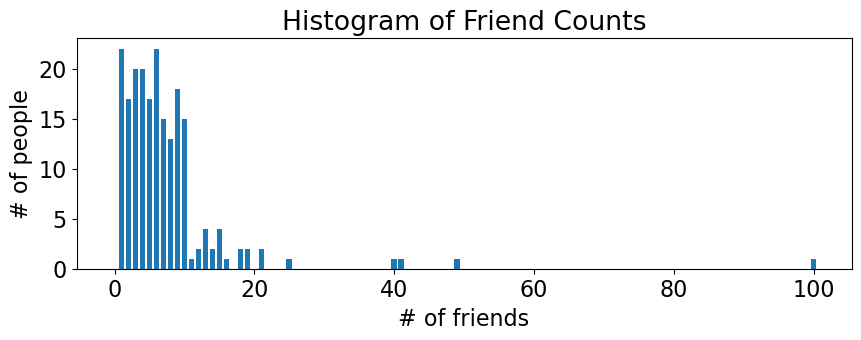

In [4]:
fig, ax = plt.subplots(figsize=(10, 3))

friend_counts = Counter(num_friends)

xs = range(101)
ys = [friend_counts[x] for x in xs]

ax.bar(xs, ys)
ax.set_xlabel("# of friends")
ax.set_ylabel("# of people")
ax.set_title("Histogram of Friend Counts")
# ax.grid("on")
plt.show(fig)

### Central Tendencies

In [5]:
def mean(xs: List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends)     # 7.33333

7.333333333333333

### Dispersion

In [6]:
def de_mean(xs: List[float]) -> List[float]:
  """Translate xs by subtracting its mean (so the result has mean 0)"""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]


def variance(xs: List[float]) -> float:
  """Almost the average squared deviation from the mean"""
  assert len(xs) >= 2, "variance requries at least two elements"

  n = len(xs)
  deviations = de_mean(xs)
  return la.sum_of_squares(deviations) / (n - 1)

In [7]:
def standard_deviation(xs: List[float]) -> float:
  """The standard deviation is the square root of the variance"""
  return np.sqrt(variance(xs))

## Correlation

In [8]:
def covariance(xs: List[float], ys: List[float]) -> float:
  """Arguments:
      - xs [List] = list of float number"""
  assert len(xs) == len(ys), "xs and ys must have the same number of elements"

  return la.dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [9]:
def correlation(xs: List[float], ys: List[float]) -> float:
  """Measures how much xs and ys vary in tandem about their means"""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)

  if stdev_x > 0  and stdev_y > 0:
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0        # if no variation, correlation is zero

### Correlation with an outlier

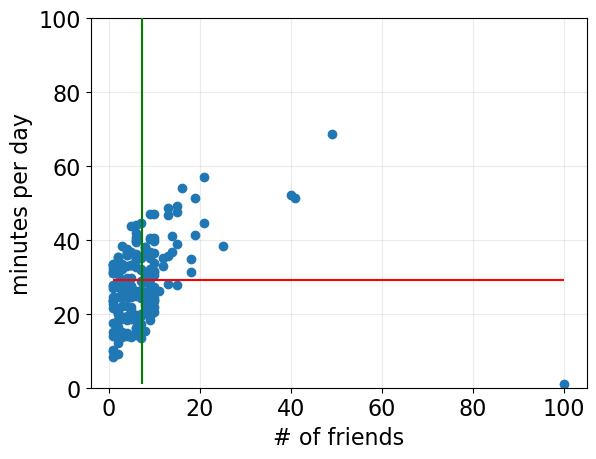

In [10]:
fig, ax = plt.subplots()

ax.plot(num_friends, daily_minutes, marker='o', linestyle="None")

ax.set_ylim([0, 100])
ax.grid("on")
ax.set_xlabel("# of friends")
ax.set_ylabel("minutes per day")

ax.hlines(np.mean(daily_minutes), 
  min(num_friends), max(num_friends), color="r", zorder=3)
ax.vlines(np.mean(num_friends), min(num_friends), max(num_friends),
  color="g", zorder=4)

plt.show(fig)

In [11]:
covariance(num_friends, daily_minutes)

22.425435139573064

In [12]:
correlation(num_friends, daily_minutes)

0.24736957366478218

## Simpson's Paradox

In [15]:
table = [
  ["West Coast", 101, 8.2],
  ["East Coast", 103, 6.5]]
headers = ["Coast", "# of members", "Avg. # of friends"]

print(tabulate(table, headers, tablefmt="simple"))

Coast         # of members    Avg. # of friends
----------  --------------  -------------------
West Coast             101                  8.2
East Coast             103                  6.5


It certainly looks like the West Coast data scientists 
are friendlier than the East Coast data scientists.

In [14]:
table = [
  ["West Coast", "PhD", 35, 3.1],
  ["East Coast", "PhD", 70, 3.2],
  ["West Coast", "No PhD", 66, 10.9],
  ["East Coast", "No PhD", 33, 13.4]]

headers = ["Coast", "Degree", "# of members", "Avg. # of friends"]

print(tabulate(table, headers, tablefmt="simple"))

Coast       Degree      # of members    Avg. # of friends
----------  --------  --------------  -------------------
West Coast  PhD                   35                  3.1
East Coast  PhD                   70                  3.2
West Coast  No PhD                66                 10.9
East Coast  No PhD                33                 13.4


Bucketing the data as East Coast/West Coast disguised the fact
that the East Coast/West Coast disguised the fact that the 
East Coast data scientists skew much more heavily toward PhD
types.

The below image is another example that will show this kind of paradox   

<img src="./img-resources/Simpsons_paradox_-_animation.gif" width=700></img>

## Some other correlational caveats

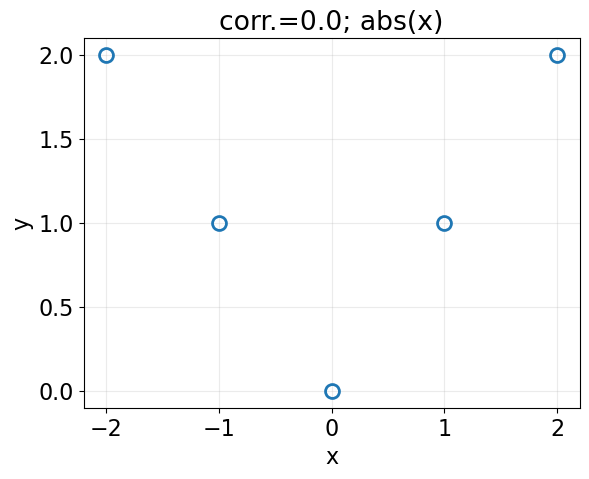

In [25]:
fig, ax = plt.subplots()

x = [-2, -1, 0, 1, 2]
y = [ 2,  1, 0, 1, 2]

ax.plot(x, y, marker="o", markersize=10, markerfacecolor="None", 
  linestyle="None", markeredgewidth=2)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid("on")
ax.set_title(f"corr.={correlation(x, y)}; abs(x)")

plt.show(fig)

$x$ and $y$ have zero correlation, but they certainly have a relationship
$\operatorname{abs}(x)$

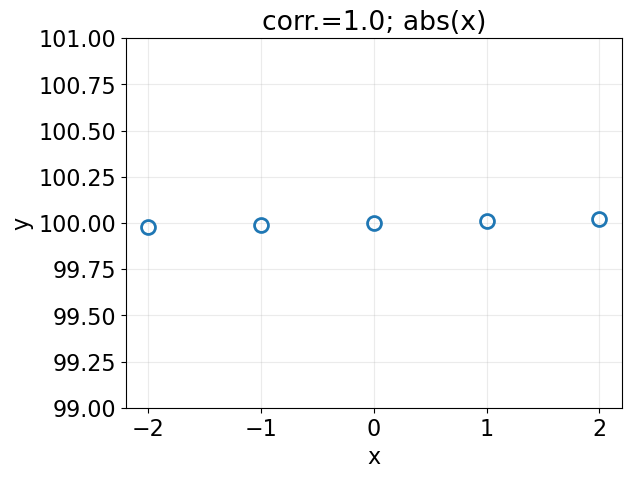

In [32]:
fig, ax = plt.subplots()

x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

ax.plot(x, y, marker="o", markersize=10, markerfacecolor="None", 
  linestyle="None", markeredgewidth=2)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([99, 101])
ax.grid("on")
ax.set_title(f"corr.={correlation(x, y)}; abs(x)")

plt.show(fig)


Correlation tells you nothing about how large the relationship is

## Correlation and Causation

Not all high correlations mean that there is a causation.   
Source: [spurious correlation](https://www.tylervigen.com/spurious-correlations)

<img src="./img-resources/spurious-corr.png" width=700></img>